# <center> Assignment 2: HR Analytics - Job Change of Data Scientists </center>

## Data

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

Note:

- The dataset is imbalanced.
- Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
- Missing imputation can be a part of your pipeline as well.

Ref: [HR Analytics - Job Change of Data Scientists](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)
**Data Descriptions**:

|Features|Descriptions
|-|-|
|enrollee_id| Unique ID for candidate|
|city| City code|
|city_ development _index| Developement index of the city (scaled)|
|gender| Gender of candidate|
|relevent_experience| Relevant experience of candidate|
|enrolled_university| Type of University course enrolled if any|
|education_level| Education level of candidate|
|major_discipline|Education major discipline of candidate|
|experience| Candidate total experience in years|
|company_size| No of employees in current employer's company|
|company_type| Type of current employer|
|lastnewjob| Difference in years between previous job and current job|
|training_hours| training hours completed|
|target| 0 – Not looking for job change, 1 – Looking for a job change|

**Train test split 80/20 random_state 42, KPI: F1-score - 0.75**

In [1]:
# Load datasets:
import pandas as pd
import numpy as np
# Visualization:
import matplotlib.pyplot as plt
import seaborn as sns
# Train models:
# (below, it depends on which model we use to call models' name)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
Job_change = pd.read_csv('Job_change_data.csv')
Job_change.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [3]:
Job_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
Job_change.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [5]:
Job_change.groupby('gender').sum()

enrollee_id  city_development_index  training_hours  target
gender                                                             
Female     21606610                1045.788           81258   326.0
Male      226232599               11093.115          863300  3012.0
Other       3423457                 165.458           12199    50.0

# **<font color="blue"> Overview</font>**

In [6]:
Job_change[['city_development_index','target','gender','relevent_experience','education_level','major_discipline','experience','company_size','company_type']].groupby(['gender','relevent_experience','education_level','major_discipline','experience','company_size','company_type']).agg(["max",'mean',"min"]).style.background_gradient(cmap="viridis")

# **Visualization**

#### **Countplots with respect to educational level** 

##### This dataset contains 5 education levels:

<li>Graduate<br></li>
<li>Masters<br></li>
<li>High School<br></li>
<li>PhD<br></li>
<li>Primary School</li>

This is an example of how to visualize and analyze related features.

In fact, you can visualize several feature combinations based on your orginial hypothesis.

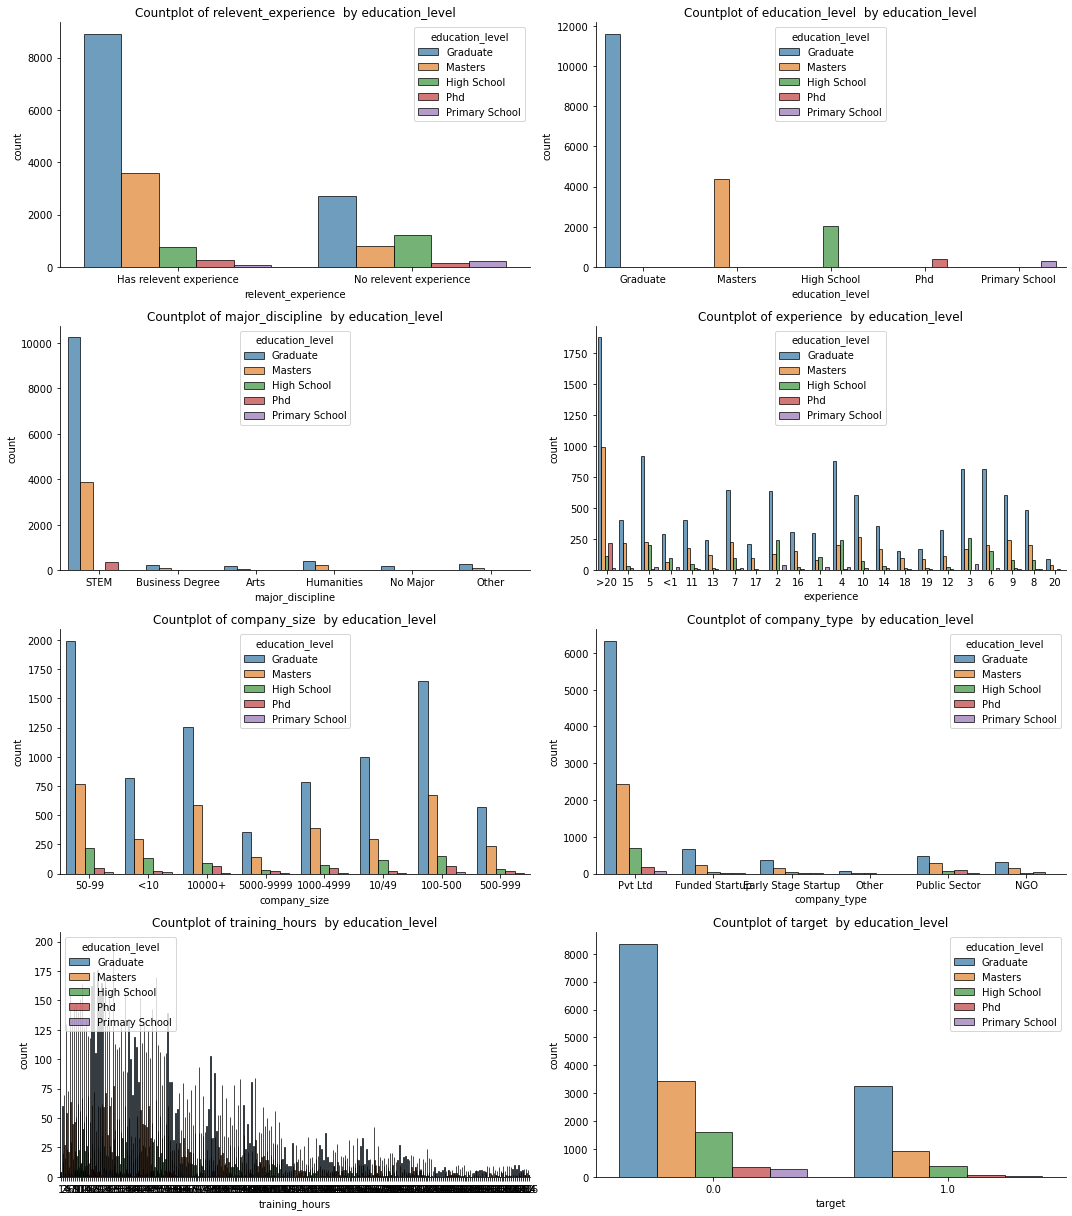

In [7]:
plt.figure(figsize=[15,17])
plot = ["relevent_experience", "education_level", "major_discipline", "experience", "company_size", "company_type", "training_hours", "target"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='education_level', edgecolor="black", alpha=0.7, data=Job_change)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(f))
    n=n+1
plt.tight_layout()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


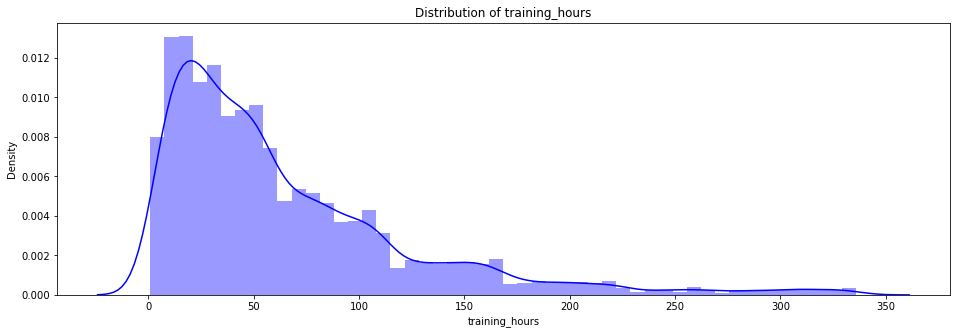

In [8]:
# Training_hours:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(Job_change["training_hours"], color="blue",ax = axes)
plt.title("Distribution of training_hours")
plt.show()

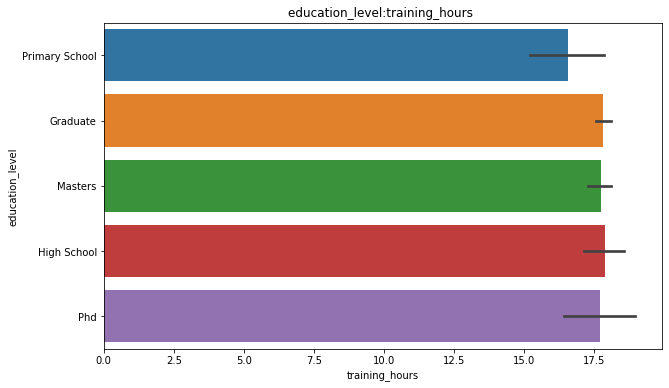

In [9]:
# education_level & training_hours:
et = Job_change.sort_values(by='training_hours', ascending=True)[:7000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=et.education_level, x=et.training_hours)
plt.xticks()
plt.xlabel('training_hours')
plt.ylabel('education_level')
plt.title('education_level:training_hours ')
plt.show()

# **<font color="yellow"> EDA </font>**

In [10]:
Job_change.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

#### <font color="violet"> - Gender </font>

In [11]:
Job_change.gender.value_counts(dropna=False)

Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64

In [12]:
Job_change.pivot_table(index='major_discipline',                                                 # pivot_table ~ groupby
                    columns='gender',
                   values='enrollee_id',
                   aggfunc='count')

gender            Female   Male  Other
major_discipline                      
Arts                  36    160      7
Business Degree       25    226      3
Humanities           118    429      8
No Major              16    163      3
Other                 36    247      7
STEM                 928  10145    115

In [13]:
Job_change[Job_change['gender'].isna()].major_discipline.value_counts(dropna=False)

STEM               3304
NaN                 835
Humanities          114
Other                91
Business Degree      73
Arts                 50
No Major             41
Name: major_discipline, dtype: int64

In [14]:
Job_change.gender = Job_change['gender'].fillna('Male')

In [15]:
Job_change.gender.isna().sum()

0

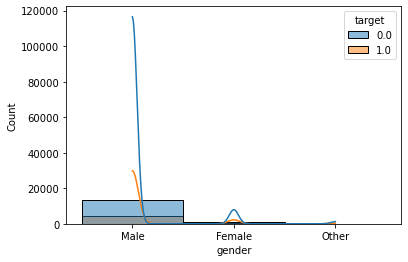

In [16]:
sns.histplot(Job_change, x='gender', hue='target', kde=True)                                       # hue='label': count quantity Y/N theo nhãn (phân màu theo 'target')
plt.show()

#### <font color="violet"> - Experience </font>

In [17]:
Job_change.experience.value_counts(dropna=False)

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
NaN      65
Name: experience, dtype: int64

In [18]:
Job_change['experience'] = Job_change['experience'].fillna(0)

In [19]:
Job_change['experience'].isna().sum()

0

#### <font color="violet"> - Education Levels </font>

In [20]:
Job_change.education_level.value_counts(dropna=False)

Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [21]:
Job_change["education_level"] = Job_change['education_level'].fillna('Graduate')
Job_change.education_level.isna().sum()

0

#### <font color="violet"> - Major Discipline </font>

In [22]:
Job_change.major_discipline.value_counts(dropna=False)

STEM               14492
NaN                 2813
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [23]:
Job_change['major_discipline'] = Job_change['major_discipline'].fillna('Other')
Job_change.major_discipline.isnull().sum()

0

#### <font color="violet"> - Enrolled University </font>

In [24]:
Job_change.enrolled_university.value_counts(dropna=False)

no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64

In [25]:
Job_change.enrolled_university = Job_change.enrolled_university.fillna('no_enrollment')
Job_change['enrolled_university'].isna().sum()

0

#### <font color="violet"> - Company Size </font>

In [26]:
Job_change.company_size.value_counts(dropna=False)

NaN          5938
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [27]:
Job_change['company_size'] = Job_change['company_size'].fillna('50-99')

In [28]:
Job_change.company_size.isnull().sum()

0

#### <font color="violet"> - Company Type </font>

In [29]:
Job_change.company_type.value_counts(dropna=False)

Pvt Ltd                9817
NaN                    6140
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [30]:
Job_change['company_type'] = Job_change['company_type'].fillna('Pvt Ltd')

In [31]:
Job_change.company_type.isna().sum()

0

#### <font color="violet"> - Last Jobs </font>

In [32]:
Job_change.last_new_job.value_counts(dropna=False)

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
NaN       423
Name: last_new_job, dtype: int64

In [33]:
Job_change['last_new_job'] = Job_change['last_new_job'].fillna('never') 

In [34]:
Job_change.last_new_job.isnull().sum()

0

In [35]:
Job_change.isnull().sum().sum()

0

# <font color="rosegold"> Features' Engineering & Selection Features </font>

In [36]:
Job_change.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624   Male   
3        33241  city_115                   0.789   Male   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience       no_enrollment        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20        50-99         Pvt Ltd            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5        50-99         Pvt Ltd        never   
3  Business Degree         <1        50-99         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

#### <font color="violet"> - City </font>

In [37]:
def transform_city(df):
    df['city'] = [int(x.split('_')[1]) for x in df['city']]
    return df

Job_change = transform_city(Job_change)

#### <font color="violet"> - Relevant experience </font>

In [38]:
def transform_relevant_experience(df):
    df["relevent_experience"] = [ 1 if x == 'Has relevent experience' else 0 for x in df["relevent_experience"]]
    return df

Job_change = transform_relevant_experience(Job_change) 

#### <font color="violet"> - Experience </font>

In [39]:
def transform_experience(df):
    df["experience"] = [25 if x == ">20" else (0 if x == "<1" else int(x)) for x in df["experience"]]
    return df

Job_change = transform_experience(Job_change)

#### <font color="violet"> - Company size </font>

In [40]:
Job_change.company_size.value_counts()

50-99        9021
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [41]:
def transform_company_size(df):
    df['company_size'] = ['10-49' if x == "10/49" else ('1-9' if x == '<10' else ('10000-50000' if x =='10000+' else x)) for x in df['company_size']]
    df['company_size_min'] = [int(x.split('-')[0]) for x in df['company_size']]
    df['company_size_max'] = [int(x.split('-')[1]) for x in df['company_size']]
    return df

Job_change = transform_company_size(Job_change)

#### <font color="violet"> - Last Jobs </font>

In [42]:
Job_change.last_new_job.value_counts()

1        8040
>4       3290
2        2900
never    2875
4        1029
3        1024
Name: last_new_job, dtype: int64

In [43]:
def transform_last_new_job(df):
    df['last_new_job']  =  [0 if x == 'never' else (5 if x == '>4' else int(x)) for x in df['last_new_job']]
    return df

Job_change = transform_last_new_job(Job_change)

In [44]:
Job_change.head()

enrollee_id  city  city_development_index gender  relevent_experience  \
0         8949   103                   0.920   Male                    1   
1        29725    40                   0.776   Male                    0   
2        11561    21                   0.624   Male                    0   
3        33241   115                   0.789   Male                    0   
4          666   162                   0.767   Male                    1   

  enrolled_university education_level major_discipline  experience  \
0       no_enrollment        Graduate             STEM          25   
1       no_enrollment        Graduate             STEM          15   
2    Full time course        Graduate             STEM           5   
3       no_enrollment        Graduate  Business Degree           0   
4       no_enrollment         Masters             STEM          25   

  company_size    company_type  last_new_job  training_hours  target  \
0        50-99         Pvt Ltd             1              36     1.0   
1        50-99         Pvt Ltd             5              47     0.0   
2        50-99         Pvt Ltd             0              83     0.0   
3        50-99         Pvt Ltd             0              52     1.0   
4        50-99  Funded Startup             4               8     0.0   

   company_size_min  company_size_max  
0                50                99  
1                50                99  
2                50                99  
3                50                99  
4                50                99

## <font color="lightblue"> One-hot Encoding </font>

In [45]:
def one_hot_encoding(df):
    enrolled_dummies = pd.get_dummies(df["enrolled_university"], dummy_na=True)
    gender_dummies = pd.get_dummies(df["gender"], dummy_na=True)
    education_dummies = pd.get_dummies(df["education_level"], dummy_na=True)
    stream_dummies = pd.get_dummies(df["major_discipline"], dummy_na=True)
    company_dummies = pd.get_dummies(df["company_type"], dummy_na=True)
    df["Type_no_enrollment"] = enrolled_dummies["no_enrollment"]
    df["Type_Full_time_course"] = enrolled_dummies["Full time course"]
    df["Type_Part_time_course"] = enrolled_dummies["Part time course"]
    df["Gender_Male"] = gender_dummies["Male"]
    df["Gender_Female"] = gender_dummies["Female"]
    df["Gender_Other"] = gender_dummies["Other"]
    df["Education_Graduate"] = education_dummies["Graduate"]
    df["Education_Masters"] = education_dummies["Masters"]
    df["Education_High_School"] = education_dummies["High School"]
    df["Education_Primary_School"] = education_dummies["Primary School"]
    df["Education_Phd"] = education_dummies["Phd"]
    df["Stream_STEM"] = stream_dummies["STEM"]
    df["Stream_Humanities"] = stream_dummies["Humanities"]
    df["Stream_Other"] = stream_dummies["Other"]
    df["Stream_Business_Degree"] = stream_dummies["Business Degree"]
    df["Stream_Arts"] = stream_dummies["Arts"]
    df["Stream_No_Major"] = stream_dummies["No Major"]
    df["Company_Pvt_Ltd"] = company_dummies["Pvt Ltd"]
    df["Company_Funded_Startup"] = company_dummies["Funded Startup"]
    df["Company_Public_Sector"] = company_dummies["Public Sector"]
    df["Company_Early_Stage_Startup"] = company_dummies["Early Stage Startup"]
    df["Company_NGO"] = company_dummies["NGO"]
    df["Company_Other"] = company_dummies["Other"]
    return df

Job_change = one_hot_encoding(Job_change)

In [46]:
Job_change

enrollee_id  city  city_development_index gender  relevent_experience  \
0             8949   103                   0.920   Male                    1   
1            29725    40                   0.776   Male                    0   
2            11561    21                   0.624   Male                    0   
3            33241   115                   0.789   Male                    0   
4              666   162                   0.767   Male                    1   
...            ...   ...                     ...    ...                  ...   
19153         7386   173                   0.878   Male                    0   
19154        31398   103                   0.920   Male                    1   
19155        24576   103                   0.920   Male                    1   
19156         5756    65                   0.802   Male                    1   
19157        23834    67                   0.855   Male                    0   

      enrolled_university education_level major_discipline  experience  \
0           no_enrollment        Graduate             STEM          25   
1           no_enrollment        Graduate             STEM          15   
2        Full time course        Graduate             STEM           5   
3           no_enrollment        Graduate  Business Degree           0   
4           no_enrollment         Masters             STEM          25   
...                   ...             ...              ...         ...   
19153       no_enrollment        Graduate       Humanities          14   
19154       no_enrollment        Graduate             STEM          14   
19155       no_enrollment        Graduate             STEM          25   
19156       no_enrollment     High School            Other           0   
19157       no_enrollment  Primary School            Other           2   

      company_size  ... Stream_Other  Stream_Business_Degree  Stream_Arts  \
0            50-99  ...            0                       0            0   
1            50-99  ...            0                       0            0   
2            50-99  ...            0                       0            0   
3            50-99  ...            0                       1            0   
4            50-99  ...            0                       0            0   
...            ...  ...          ...                     ...          ...   
19153        50-99  ...            0                       0            0   
19154        50-99  ...            0                       0            0   
19155        50-99  ...            0                       0            0   
19156      500-999  ...            1                       0            0   
19157        50-99  ...            1                       0            0   

       Stream_No_Major  Company_Pvt_Ltd  Company_Funded_Startup  \
0                    0                1                       0   
1                    0                1                       0   
2                    0                1                       0   
3                    0                1                       0   
4                    0                0                       1   
...                ...              ...                     ...   
19153                0                1                       0   
19154                0                1                       0   
19155                0                1                       0   
19156                0                1                       0   
19157                0                1                       0   

       Company_Public_Sector  Company_Early_Stage_Startup  Company_NGO  \
0                          0                            0            0   
1                          0                            0            0   
2                          0                            0            0   
3                          0                            0            0   
4                          0                            0

In [47]:
Job_change = Job_change.drop(['enrollee_id','gender','enrolled_university','education_level','major_discipline','company_type','company_size'], axis=1)

## <font color="blue"> Checking Balanced Data </font>

In [48]:
Job_change.target.value_counts(dropna=False)

0.0    14381
1.0     4777
Name: target, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


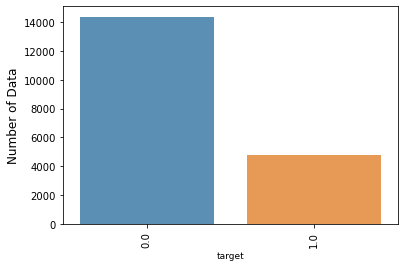

In [49]:
# Target
# 0 – Not looking for job change,
# 1 – Looking for a job change
# As you can see, here we have imbalanced data, the number of 1 ( Looking for a job change) < 0 (Not looking for job change)
mnj = Job_change['target'].value_counts()  
plt.figure(figsize=(6,4))
sns.barplot(mnj.index, mnj.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
plt.show()

In [50]:
X = Job_change.drop("target",axis=1)
Y = pd.DataFrame(Job_change["target"])

In [51]:
Y

target
0         1.0
1         0.0
2         0.0
3         1.0
4         0.0
...       ...
19153     1.0
19154     1.0
19155     0.0
19156     0.0
19157     0.0

[19158 rows x 1 columns]

## <font color="violet"> Handle Imbalanced Data </font>

- <font color="green"> **Use Upscaling:** </font>
    - <font color="pink"> **Upsampling:** </font> "from imblearn.over_sampling import SMOTE": dựa vào những đặc tính của data để Up (not duplicated)
    - <font color="pink"> **Downsampling:** </font> xóa bớt Data (not recommend) --> because: loss data

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

In [54]:
Y.target.value_counts()

0.0    14381
1.0    14381
Name: target, dtype: int64

## <font color="pink"> Nomalization </font>

In [55]:
df = X.copy()
df['target'] = Y['target']

In [56]:
from sklearn.preprocessing import normalize

In [57]:
cols_to_be_normalized = ["city","city_development_index","experience","last_new_job","training_hours","company_size_min","company_size_max"]
cols_not_to_be_normalized = ["relevent_experience","Type_no_enrollment","Type_Full_time_course","Type_Part_time_course","Gender_Male","Gender_Female",
                            "Gender_Other","Education_Graduate","Education_Masters","Education_High_School","Education_Primary_School","Education_Phd",
                             "Stream_STEM","Stream_Humanities","Stream_Other","Stream_Business_Degree","Stream_Arts","Stream_No_Major",
                            "Company_Pvt_Ltd","Company_Funded_Startup","Company_Public_Sector", "Company_Early_Stage_Startup", "Company_NGO",
                            "Company_Other", "target"]

train_normalized = normalize(df[cols_to_be_normalized])
train_boolean = df[cols_not_to_be_normalized]
df_normalized = pd.DataFrame(train_normalized,columns = cols_to_be_normalized)
df_boolean = pd.DataFrame(train_boolean,columns=cols_not_to_be_normalized)

df = df_normalized.merge(df_boolean,left_index=True, right_index=True)

In [58]:
X = df.drop("target", axis = 1)
Y = df["target"]

# <font color="Orange"> Model: Logicstic Regression </font>

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True, stratify = Y)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
logitsic_model = LogisticRegression()

In [63]:
logitsic_model.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
y_pred = logitsic_model.predict(X_test)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.92      0.82      2877
         1.0       0.90      0.66      0.76      2876

    accuracy                           0.79      5753
   macro avg       0.81      0.79      0.79      5753
weighted avg       0.81      0.79      0.79      5753



In [67]:
confusion_matrix(y_test,y_pred)

array([[2656,  221],
       [ 983, 1893]], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


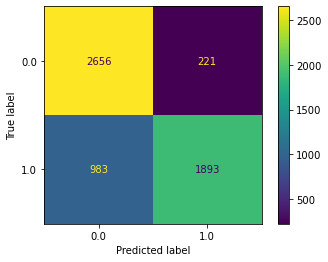

In [68]:
plot_confusion_matrix(logitsic_model, X_test, y_test)
plt.show()

In [69]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

Accuracy :  0.7907178863201808


In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
y_pred_1 = forest.predict(X_test)
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84      2877
         1.0       0.85      0.82      0.83      2876

    accuracy                           0.84      5753
   macro avg       0.84      0.84      0.84      5753
weighted avg       0.84      0.84      0.84      5753



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


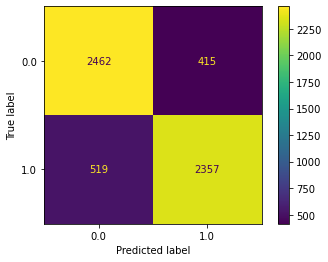

In [73]:
plot_confusion_matrix(forest, X_test, y_test)
plt.show()